In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
start_date = datetime.datetime(2012, 1, 1)
end_date = datetime.datetime(2022, 1, 1)

tickers = ["NFLX", "TSLA", "AMD", "^IXIC"]

# inverval="m" gives monthly returns
data = web.get_data_yahoo(tickers, start_date, end_date, interval="m")

In [3]:
data = data["Adj Close"]
print(data.tail())

Symbols           NFLX         TSLA         AMD         ^IXIC
Date                                                         
2021-09-01  610.340027   775.479980  102.900002  14448.580078
2021-10-01  690.309998  1114.000000  120.230003  15498.389648
2021-11-01  641.900024  1144.760010  158.369995  15537.690430
2021-12-01  602.440002  1056.780029  143.899994  15644.969727
2022-01-01  427.140015   936.719971  114.250000  14239.879883


In [4]:
log_returns = np.log(data/data.shift(1))
log_returns.head()
log_returns = log_returns.dropna(axis=0)

# How to calculate the beta of a security?

`Beta = Covariance / Variance`

* Covariance: Measure of a stock's return relative to that of the market

* Variance: Measure of how the market moves relative to its mean

In [5]:
cov = log_returns.cov()
var = log_returns["^IXIC"].var()

In [6]:
print(cov)
print("Market Variance:", var)

Symbols      NFLX      TSLA       AMD     ^IXIC
Symbols                                        
NFLX     0.017283  0.005896  0.004096  0.002364
TSLA     0.005896  0.025779  0.006916  0.003368
AMD      0.004096  0.006916  0.025415  0.003786
^IXIC    0.002364  0.003368  0.003786  0.001942
Market Variance: 0.0019423777956599673


In [7]:
beta_netflix = cov.loc["NFLX", "^IXIC"]/var
print("NFLX beta:", beta_netflix)

NFLX beta: 1.2169474388448782


# Using Linear Regression to calculate the beta

In [8]:
def linear_regression_model(df, ticker1, ticker2):
  """df: dataframe: log_returns with tickers as columns

  ticker1: usually a particular stock's log normal returns
  
  ticker2: index, log normal returns of Nasdaq or S&P 500
  
  returns None
  """
  # .reshape(-1 means infere the length of the array, 1 means every item in the list is a list of length 1)
  # [[192], [21], [149]]
  Y = df[ticker1].to_numpy().reshape(-1, 1)
  X = df[ticker2].to_numpy().reshape(-1, 1)
  # X: independent variable
  # Y: dependent variable

  lin_reg = LinearRegression()
  # Fit the data, train the model
  lin_reg.fit(X, Y)

  alpha = lin_reg.intercept_[0]  # Intercept
  beta = lin_reg.coef_[0, 0]  # Slope

  # Predict
  Y_predict = lin_reg.predict(X)

  # Model evaluation, quantify how well a regression model fits a dataset
  rmse = mean_squared_error(Y, Y_predict)
  r2 = r2_score(Y, Y_predict)

  print("Alpha:", alpha)
  print("Beta:", beta)
  print("Root Mean Squared Error:", rmse)
  print("Coefficient of Determination:", r2)

  # Plot a scatter graph
  fig, ax = plt.subplots()
  fig.suptitle(f"Linear Regression Model for {ticker1} against {ticker2}")

  ax.set_title(f"Alpha: {round(alpha, 5)}, Beta: {round(beta, 3)}")

  ax.scatter(X, Y)
  
  ax.set_xlabel("Nasdaq Monthly LN Returns")
  ax.set_ylabel(f"{ticker1} Monthly LN Returns")

  # Plot the line of best fit
  ax.plot(X, Y_predict, color="red")

  plt.tight_layout()
  plt.show()


## How to evaluate the linear regression model?

### Root Mean Square Error
RMSE: Lower values of RMSE indicate better fit.

### r^2: Coefficient of Determination
Shows the proportion of the variation in the dependent variable that is predictable from the independent variable.

Example: A r squared value of 30% shows that 30% of the data fit the regression model. It shows a weak to medium correlation between the independent variable and the dependent variable.

Alpha: 0.010338243033011733
Beta: 1.2169474388448784
Root Mean Squared Error: 0.014286209552386535
Coefficient of Determination: 0.16644166274418826


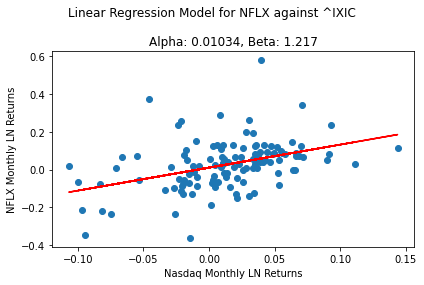

Alpha: 0.01892118045270416
Beta: 1.7339378636838123
Root Mean Squared Error: 0.019772678503633956
Coefficient of Determination: 0.22653755441061496


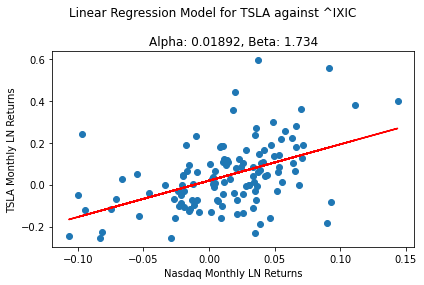

Alpha: -0.0027139734362621147
Beta: 1.94910516017338
Root Mean Squared Error: 0.017885682229602223
Coefficient of Determination: 0.2903437511351328


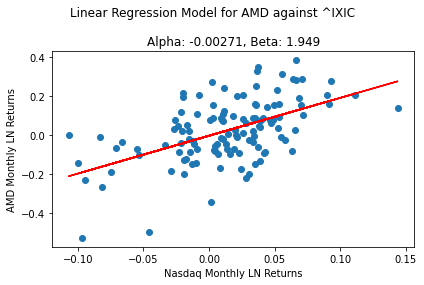

In [9]:
# Nasdaq or S&P 500
index_tick = tickers[-1]

for tick in tickers[:-1]:
  linear_regression_model(log_returns, tick, index_tick)